# Olympics EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Updated to new seaborn style setup
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Load the dataset

In [4]:
athletes = pd.read_csv("../data/athlete_events.csv")
nocs = pd.read_csv("../data/noc_regions.csv")
athletes_nocs = athletes.merge(nocs, "left", "NOC")
athletes_nocs.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Basic Info

In [5]:
print(f"Shape: {athletes.shape}")
athletes_nocs.info()

Shape: (271116, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [6]:
# Summary statistics for all columns
athletes_nocs.describe(include="all")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783,270746,5039
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3,205,21
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372,18853,2583
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values

In [7]:
# Check for missing data
athletes_nocs.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

## Medals by Country

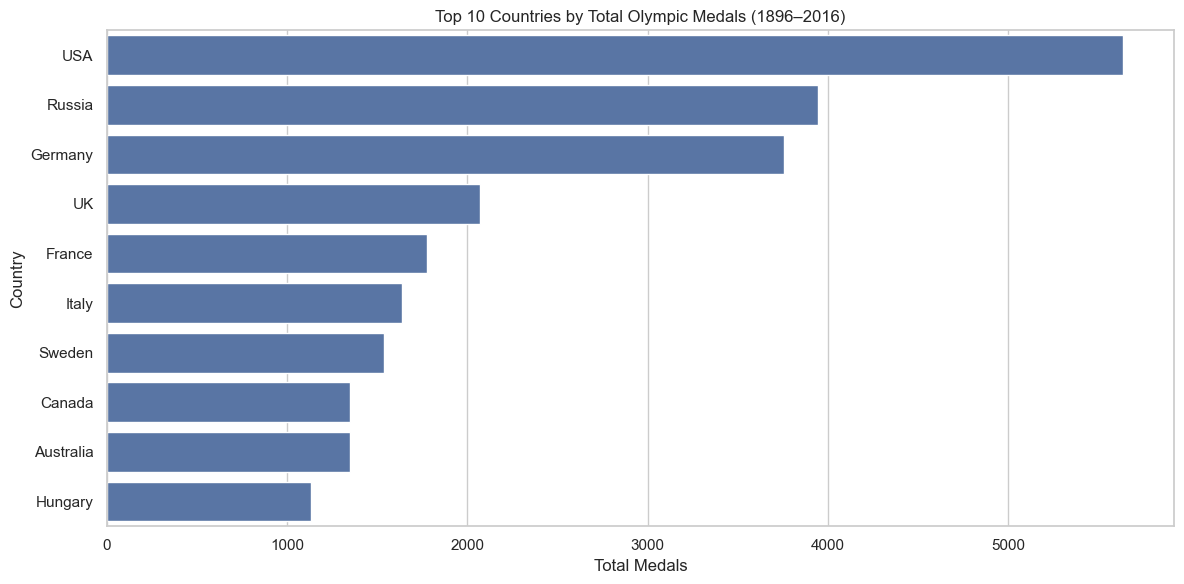

In [8]:
medal_winners = athletes_nocs.dropna(subset="Medal")

medals_by_country = (
    medal_winners.groupby(["region"])
    .size()
    .reset_index(name="medal_count")
    .sort_values(by="medal_count", ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=medals_by_country.head(10), x="medal_count", y="region")
plt.title("Top 10 Countries by Total Olympic Medals (1896–2016)")
plt.xlabel("Total Medals")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

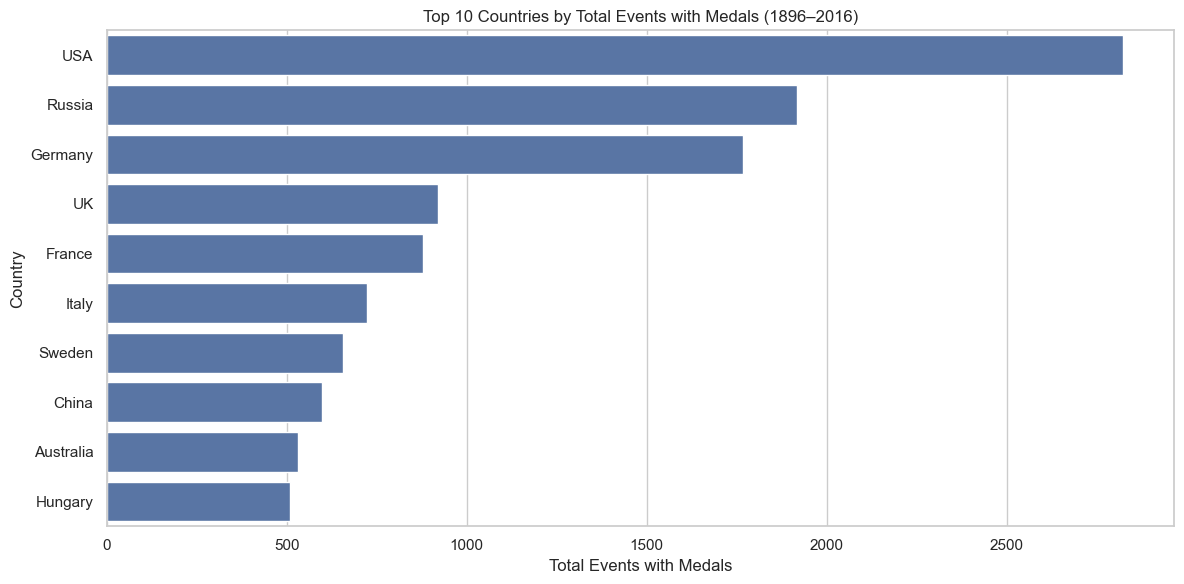

In [9]:
events_with_medal_by_country = (
    medal_winners.drop_duplicates(subset=["Year", "Event", "Medal", "region"])
    .groupby(["region"])
    .size()
    .reset_index(name="events_with_medal")
    .sort_values(by="events_with_medal", ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=events_with_medal_by_country.head(10), x="events_with_medal", y="region")
plt.title("Top 10 Countries by Total Events with Medals (1896–2016)")
plt.xlabel("Total Events with Medals")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

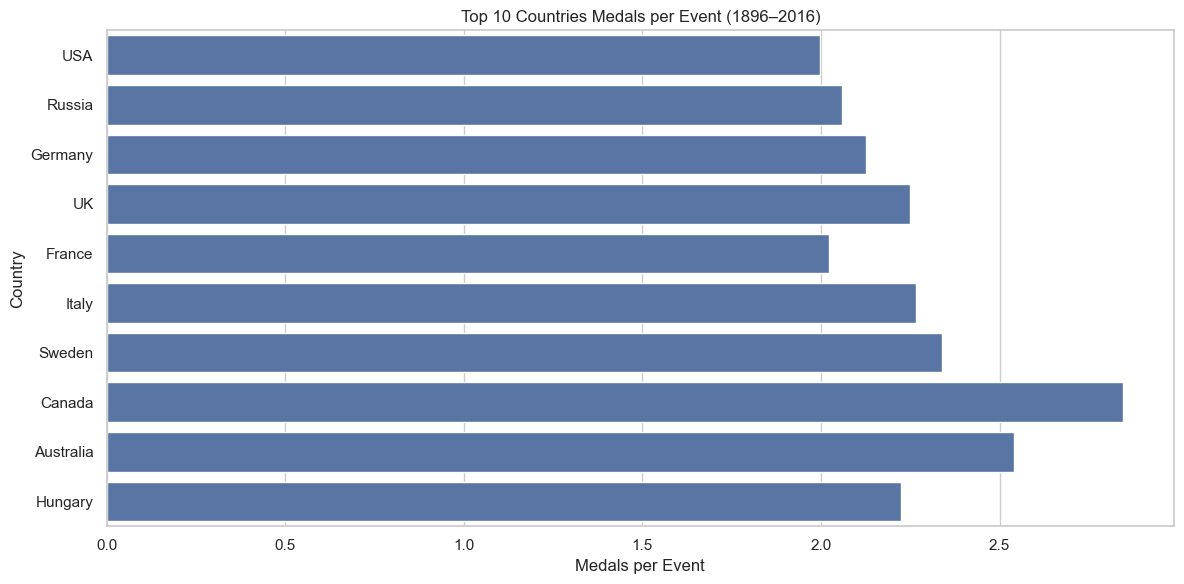

In [10]:
events_with_medal_by_country = (
    medal_winners.drop_duplicates(subset=["Year", "Event", "Medal", "region"])
    .groupby(["region"])
    .size()
    .reset_index(name="events_with_medal")
    .sort_values(by="events_with_medal", ascending=False)
)
medals_per_event_df = medals_by_country.merge(events_with_medal_by_country, on="region")
medals_per_event_df["medals_per_event"] = (
    medals_per_event_df["medal_count"] /
    medals_per_event_df["events_with_medal"])

plt.figure(figsize=(12, 6))
sns.barplot(data=medals_per_event_df.head(10), x="medals_per_event", y="region")
plt.title("Top 10 Countries Medals per Event (1896–2016)")
plt.xlabel("Medals per Event")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

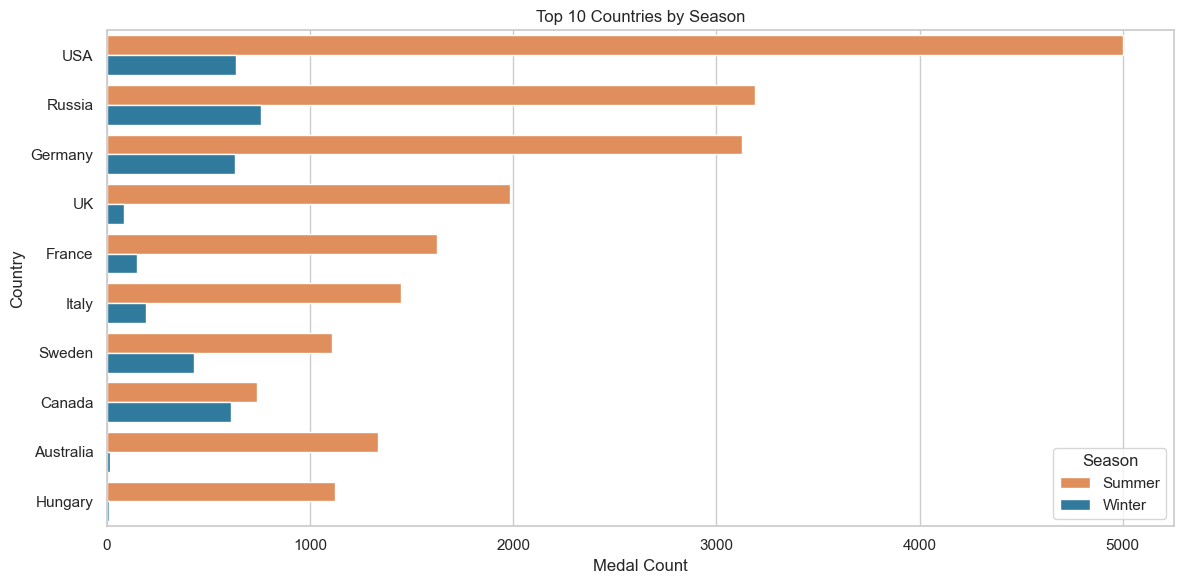

In [11]:
medals_by_season = (
    medal_winners.groupby(["region", "Season"])
    .size()
    .reset_index(name="count")
)

top_countries = medals_by_country.head(10)["region"].tolist()
top_medals_by_season = medals_by_season[medals_by_season["region"].isin(top_countries)]

medal_colors = {
    "Summer": "#F68946",
    "Winter": "#1E81B0"
}

plt.figure(figsize=(12, 6))
sns.barplot(data=top_medals_by_season, x="count", y="region", hue="Season", palette= medal_colors,
            order=top_countries)
plt.title("Top 10 Countries by Season")
plt.xlabel("Medal Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

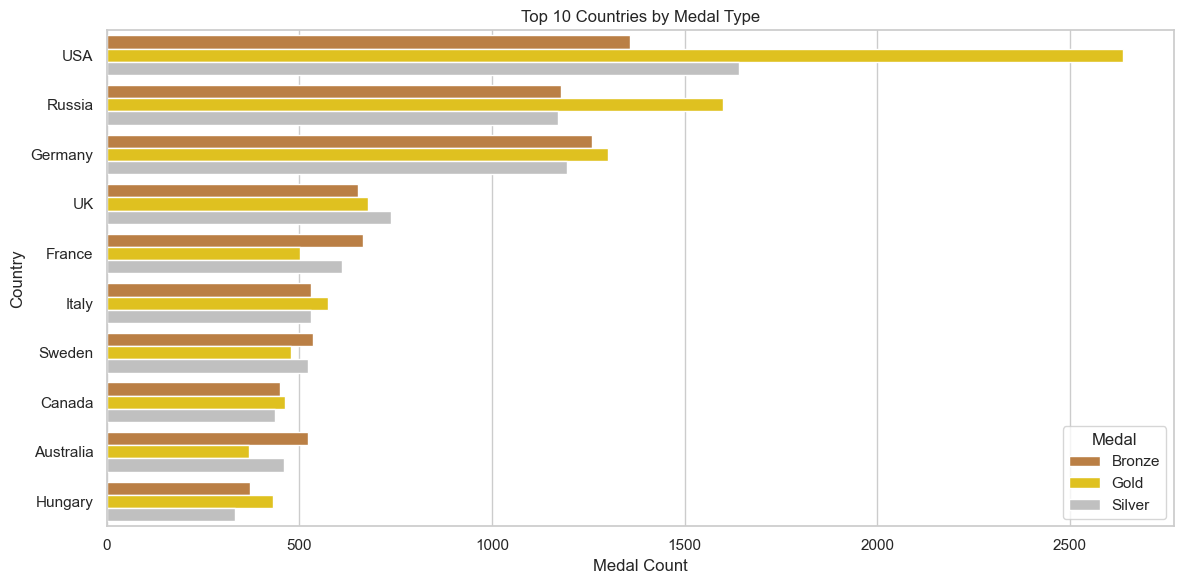

In [12]:
medals_by_type = (
    medal_winners.groupby(["region", "Medal"])
    .size()
    .reset_index(name="count")
)

top_countries = medals_by_country.head(10)["region"].tolist()
top_medals = medals_by_type[medals_by_type["region"].isin(top_countries)]

medal_colors = {
    "Gold": "#FFD700",     # Gold
    "Silver": "#C0C0C0",   # Silver
    "Bronze": "#CD7F32"    # Bronze
}

plt.figure(figsize=(12, 6))
sns.barplot(data=top_medals, x="count", y="region", hue="Medal", palette=medal_colors, order=top_countries)
plt.title("Top 10 Countries by Medal Type")
plt.xlabel("Medal Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## Medal winners age

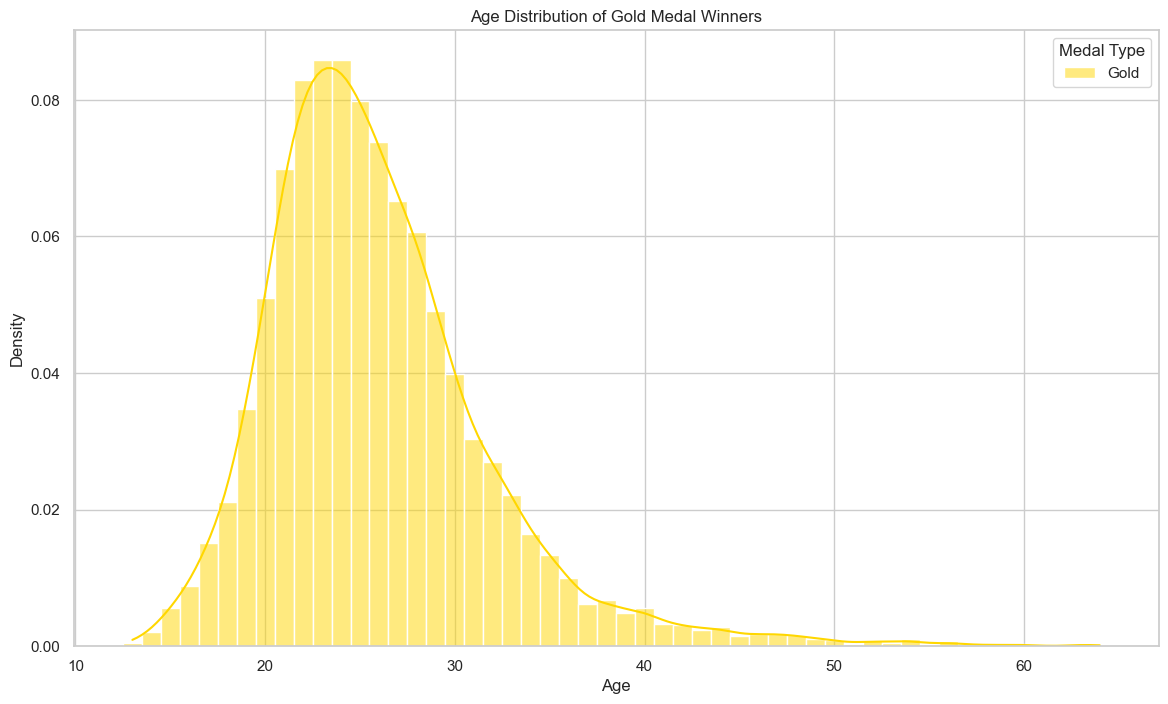

In [13]:
medal_winners_age_clean = medal_winners.dropna(subset="Age")
gold_medalists = medal_winners_age_clean[medal_winners_age_clean["Medal"] == "Gold"]

min_age = int(gold_medalists["Age"].min())
max_age = int(gold_medalists["Age"].max())

plt.figure(figsize=(14, 8))

# Plot histograms for each medal type
sns.histplot(gold_medalists["Age"], color="gold", kde=True, label="Gold",
             bins=np.arange(min_age - 0.5, max_age + 1.5, 1),
             stat="density", kde_kws={'bw_adjust': 1})

# Customize plot
plt.title("Age Distribution of Gold Medal Winners")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Medal Type")
#plt.tight_layout()
plt.show()

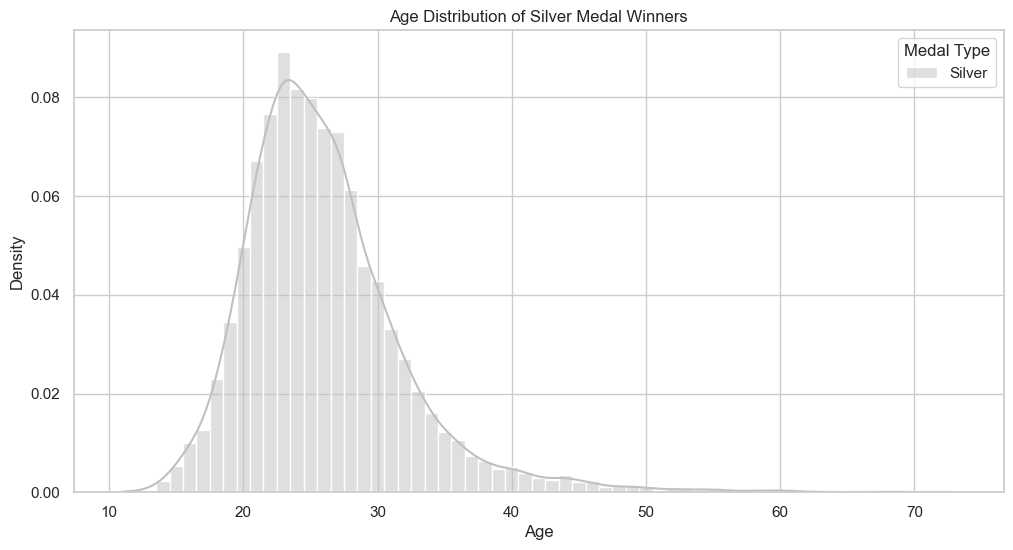

In [14]:
silver_medalists = medal_winners_age_clean[medal_winners_age_clean["Medal"] == "Silver"]

min_age = int(silver_medalists["Age"].min())
max_age = int(silver_medalists["Age"].max())

# Plot histograms for each medal type
sns.histplot(silver_medalists["Age"], color="silver", kde=True, label="Silver",
             bins=np.arange(min_age - 0.5, max_age + 1.5, 1),
             stat="density", kde_kws={'bw_adjust': 1})

# Customize plot
plt.title("Age Distribution of Silver Medal Winners")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Medal Type")
#plt.tight_layout()
plt.show()

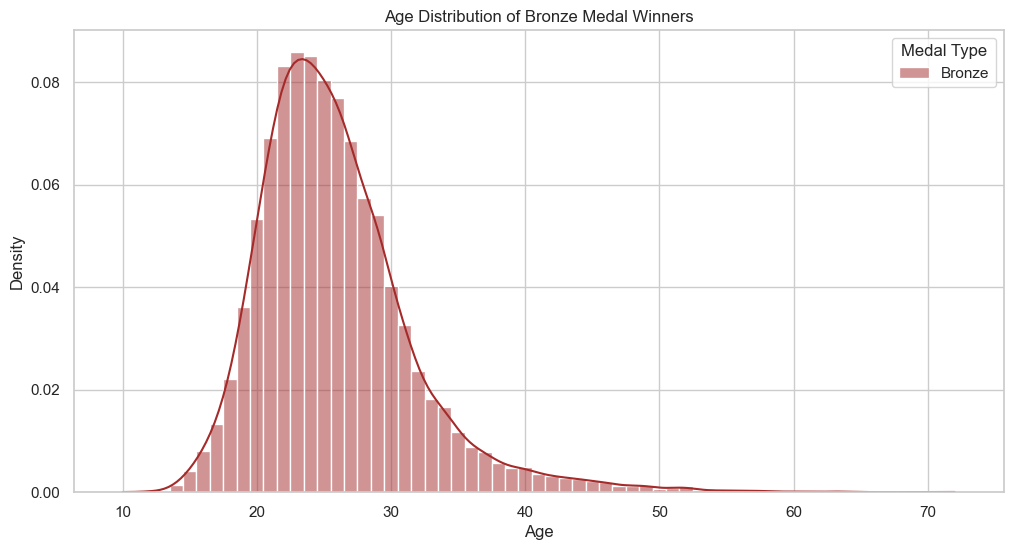

In [15]:
bronze_medalists = medal_winners_age_clean[medal_winners_age_clean["Medal"] == "Bronze"]

min_age = int(bronze_medalists["Age"].min())
max_age = int(bronze_medalists["Age"].max())

# Plot histograms for each medal type
sns.histplot(bronze_medalists["Age"], color="brown", kde=True, label="Bronze",
             bins=np.arange(min_age - 0.5, max_age + 1.5, 1),
             stat="density", kde_kws={'bw_adjust': 1})

# Customize plot
plt.title("Age Distribution of Bronze Medal Winners")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Medal Type")
#plt.tight_layout()
plt.show()

## Evolution of athletes

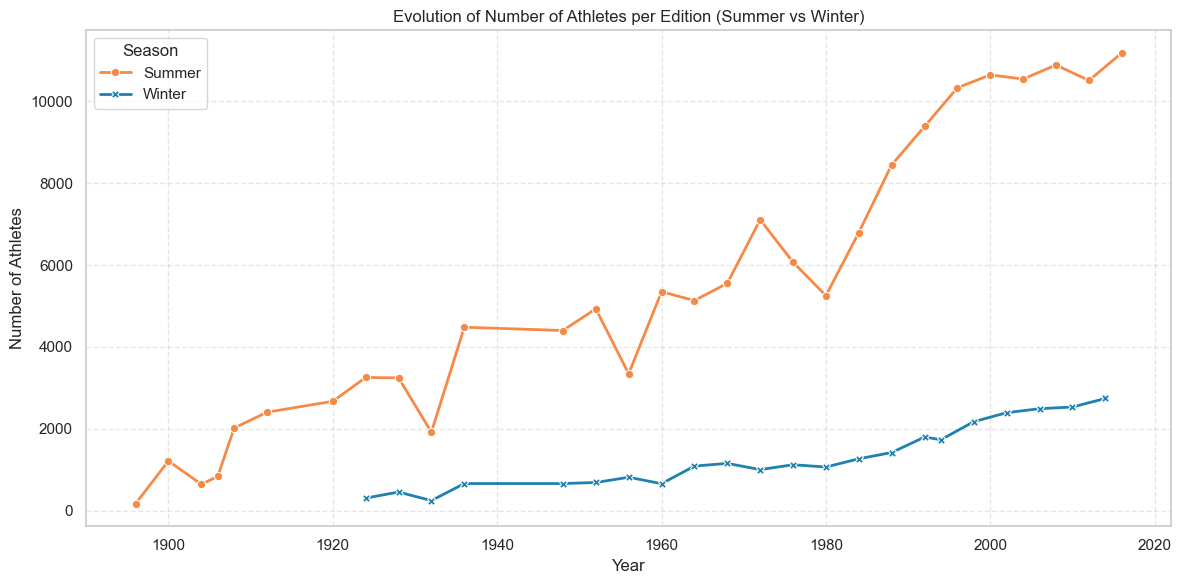

In [16]:
athletes_per_olympics = (
    athletes_nocs.drop_duplicates(subset=["Name", "Year", "Season"])
    .groupby(["Season", "Year"])
    .size()
    .reset_index(name="athletes count")
    .sort_values("Year")
)


sns.lineplot(
    data=athletes_per_olympics,
    x="Year",
    y="athletes count",
    hue="Season",
    style="Season",
    markers=True,
    dashes=False,
    palette={"Summer": "#F68946", "Winter": "#1E81B0"},
    linewidth=2
)

plt.title("Evolution of Number of Athletes per Edition (Summer vs Winter)")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Individual athletes

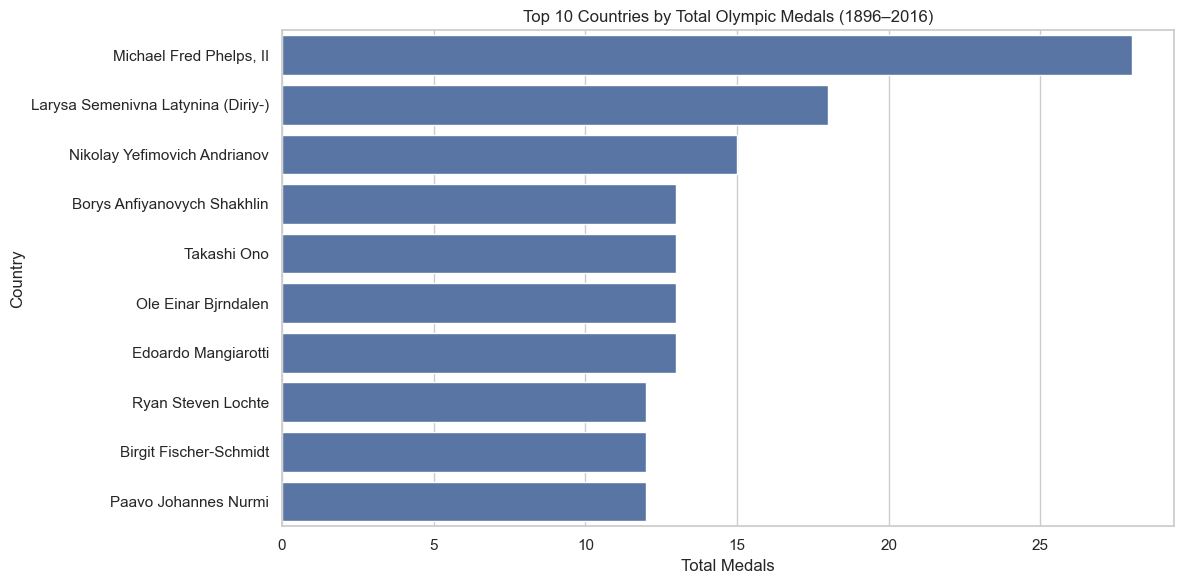

In [19]:
medals_by_athlete = (
    medal_winners.groupby(["Name"])
    .size()
    .reset_index(name="medal_count")
    .sort_values(by="medal_count", ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=medals_by_athlete.head(10), x="medal_count", y="Name")
plt.title("Top 10 Countries by Total Olympic Medals (1896–2016)")
plt.xlabel("Total Medals")
plt.ylabel("Country")
plt.tight_layout()
plt.show()